In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
#read csv data
df = pd.read_csv("A1.1-data.csv")
df.head()

,Timestamp,Age,What is your go-to source of entertainment?,"On average, how many hours in a day do you spend consuming media?"
0,2/8/2023 10:04:47,18,TV Shows,5.0
1,2/8/2023 10:46:24,20,TV Shows,3.0
2,2/8/2023 10:53:23,21,"Social Media (YouTube, Vimeo etc.)",4.0
3,2/8/2023 10:54:18,19,Anime,1.0
4,2/8/2023 11:04:42,19,"Social Media (YouTube, Vimeo etc.)",10.0


In [61]:
#delete the first column
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Age,What is your go-to source of entertainment?,"On average, how many hours in a day do you spend consuming media?"
0,18,TV Shows,5.0
1,20,TV Shows,3.0
2,21,"Social Media (YouTube, Vimeo etc.)",4.0
3,19,Anime,1.0
4,19,"Social Media (YouTube, Vimeo etc.)",10.0


In [62]:
#rename the columns
df.rename(columns={'What is your go-to source of entertainment?':'Entertainment', 'On average, how many hours in a day do you spend consuming media?':'Hours'}, inplace=True)
df.head(10)


,Age,Entertainment,Hours
0,18,TV Shows,5.0
1,20,TV Shows,3.0
2,21,"Social Media (YouTube, Vimeo etc.)",4.0
3,19,Anime,1.0
4,19,"Social Media (YouTube, Vimeo etc.)",10.0
5,20,"Social Media (YouTube, Vimeo etc.)",4.0
6,18,Anime,4.5
7,21,Anime,2.0
8,46,"Social Media (YouTube, Vimeo etc.)",2.0
9,19,Video Games,5.0


In [63]:
# data statistics
df.describe()

,Age,Hours
count,103.000000,103.000000
mean,26.854369,4.066019
std,13.355184,2.941073
min,5.000000,0.800000
25%,19.000000,2.000000
50%,21.000000,3.000000
75%,33.000000,5.000000
max,73.000000,20.000000


### Calculating Central Tendency and Dispersion

In [64]:
mean = df['Age'].mean()
median = df['Age'].median()
mode = df['Age'].mode()

std = df['Age'].std()
var = df['Age'].var()
range = df['Age'].max() - df['Age'].min()
cv = (std/mean) * 100


In [65]:
## Table of Central Tendency
table_of_central_tendency = pd.DataFrame({'Mean': mean, 'Median': median, 'Mode': mode}, index=[0])
table_of_central_tendency

,Mean,Median,Mode
0,26.854369,21.0,21


In [66]:
# Table of Dispersion
table_of_dispersion = pd.DataFrame({'Standard Deviation': std, 'Variance': var, 'Range': range, 'Coefficient of Variation': cv}, index=[0])
table_of_dispersion


,Standard Deviation,Variance,Range,Coefficient of Variation
0,13.355184,178.360937,68,49.731885


## Frequency Distribution Table 

### Qualitative Data

In [67]:
columns= ['Entertainment', 'Frequency', 'Relative Frequency', 'Percentage Frequency']
Frequency_distribution_table_Qualitative_Data = pd.DataFrame(columns=columns)
Frequency_distribution_table_Qualitative_Data['Entertainment'] = df['Entertainment'].unique()

#  Write A function to  find the total category of each entertainment
def find_total_category(entertainment):
    return df[df['Entertainment'] == entertainment]['Hours'].count()

# Write A function to  find the relative frequency of each entertainment
def find_relative_frequency(entertainment):
    return find_total_category(entertainment) / len(df['Entertainment'])

# Write A function to  find the percentage frequency of each entertainment
def find_percentage_frequency(entertainment):
    return find_relative_frequency(entertainment) * 100

# Use apply function to find the total category, relative frequency, and percentage frequency of each entertainment
Frequency_distribution_table_Qualitative_Data['Frequency'] = Frequency_distribution_table_Qualitative_Data['Entertainment'].apply(find_total_category)
Frequency_distribution_table_Qualitative_Data['Relative Frequency'] = Frequency_distribution_table_Qualitative_Data['Entertainment'].apply(find_relative_frequency)
Frequency_distribution_table_Qualitative_Data['Percentage Frequency'] = Frequency_distribution_table_Qualitative_Data['Entertainment'].apply(find_percentage_frequency)



print(Frequency_distribution_table_Qualitative_Data)


                                       Entertainment  Frequency  \
0                                           TV Shows         26   
1                 Social Media (YouTube, Vimeo etc.)         36   
2                                              Anime         10   
3                                        Video Games          7   
4  Shorts Based Content (TikTok, YouTube Shorts, ...         17   
5                                             Movies          7   

   Relative Frequency  Percentage Frequency  
0            0.252427             25.242718  
1            0.349515             34.951456  
2            0.097087              9.708738  
3            0.067961              6.796117  
4            0.165049             16.504854  
5            0.067961              6.796117  


### Quantitative Data

In [68]:
## Frequency Distribution Table of Quantitative Data
columns= ['Class Limits','Class Boundaries', 'Frequency', 'Relative Frequency', 'Percentage Frequency', 'Cumulative Frequency', 'Midpoint']
Frequency_distribution_table_Quantitative_Data = pd.DataFrame(columns=columns)

lowest=  np.min(df['Age'])
class_width = round( (np.max(df['Age']) - np.min(df['Age']))/14 )

lower_class = []
upper_class = []

i = 5
while i <= 70:
    lower_class.append(i)
    upper_class.append(i+class_width)
    i=i+6

lower_class_boundary = [(i-0.5) for i in lower_class ] 
upper_class_boundary = [(i+0.5) for i in upper_class ]

# Class Limits
CL = [] 
i=0
while i < len(lower_class_boundary):
   CL.append(str(lower_class[i]) + "-" + str(upper_class[i]))
   i = i + 1

# Class Boundaries
CB = [] 
i=0
while i < len(lower_class_boundary):
   CB.append(str(lower_class_boundary[i]) + "-" + str(upper_class_boundary[i]))
   i = i + 1

# Frequency
Frequency = []
a=0
while a < len(lower_class_boundary):
    Frequency.append(df[(df['Age'] > lower_class_boundary[a]) & (df['Age'] <= upper_class_boundary[a])]['Age'].count())
    a = a + 1

# Midpoint
b = 0
mid_point = []
while b < len(lower_class_boundary):
    #calculate the mid point of ages in each class
    mid_point.append((lower_class_boundary[b] + upper_class_boundary[b])/2)
    b = b + 1

Frequency_distribution_table_Quantitative_Data['Class Limits'] = CL
Frequency_distribution_table_Quantitative_Data['Class Boundaries'] = CB
Frequency_distribution_table_Quantitative_Data['Frequency'] = Frequency
Frequency_distribution_table_Quantitative_Data['Relative Frequency'] = Frequency_distribution_table_Quantitative_Data['Frequency'] / len(df['Age'])
Frequency_distribution_table_Quantitative_Data['Percentage Frequency'] = Frequency_distribution_table_Quantitative_Data['Relative Frequency'] * 100
Frequency_distribution_table_Quantitative_Data['Cumulative Frequency'] = Frequency_distribution_table_Quantitative_Data['Frequency'].cumsum()
Frequency_distribution_table_Quantitative_Data['Midpoint'] = mid_point    
Frequency_distribution_table_Quantitative_Data





,Class Limits,Class Boundaries,Frequency,Relative Frequency,Percentage Frequency,Cumulative Frequency,Midpoint
0,5-10,4.5-10.5,3,0.029126,2.912621,3,7.5
1,11-16,10.5-16.5,4,0.038835,3.883495,7,13.5
2,17-22,16.5-22.5,54,0.524272,52.427184,61,19.5
3,23-28,22.5-28.5,13,0.126214,12.621359,74,25.5
4,29-34,28.5-34.5,5,0.048544,4.854369,79,31.5
5,35-40,34.5-40.5,7,0.067961,6.796117,86,37.5
6,41-46,40.5-46.5,8,0.077670,7.766990,94,43.5
7,47-52,46.5-52.5,4,0.038835,3.883495,98,49.5
8,53-58,52.5-58.5,1,0.009709,0.970874,99,55.5
9,59-64,58.5-64.5,1,0.009709,0.970874,100,61.5


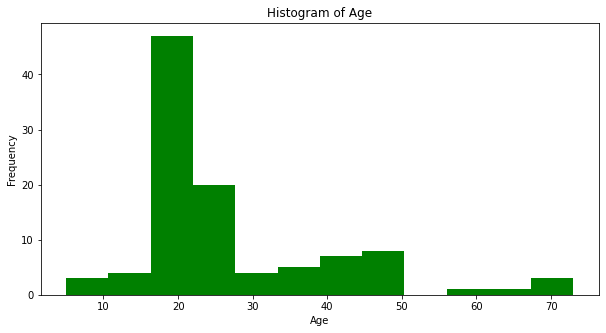

In [69]:
# Histogram
plt.figure(figsize=(10,5))
plt.hist(df['Age'], bins=12, color='green')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


c:\Users\Ali Zain\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


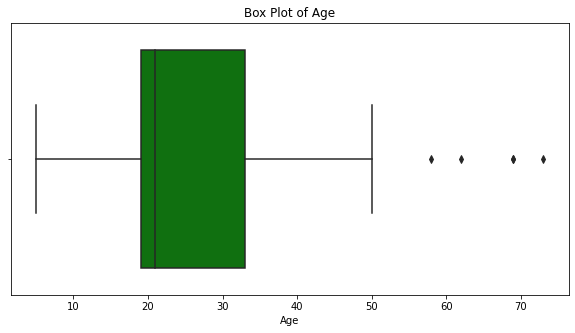

In [70]:
# Plottings on Age column using seaborn
plt.figure(figsize=(10,5))
sns.boxplot(df['Age'], color='green')
plt.title('Box Plot of Age')
plt.show()


<Figure size 720x360 with 0 Axes>

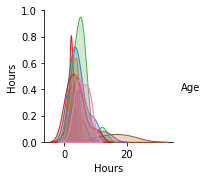

In [71]:
# Pair Plot of Age and Hours
plt.figure(figsize=(10,5))
sns.pairplot(df, hue='Age', palette='Set1')


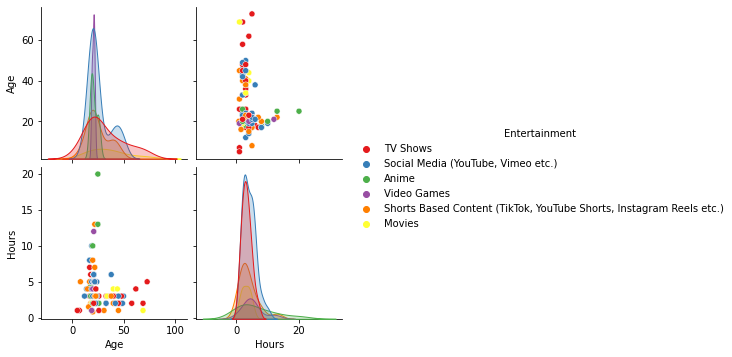

In [72]:
# Pair Plot
sns.pairplot(df, hue='Entertainment', palette='Set1')
plt.show()


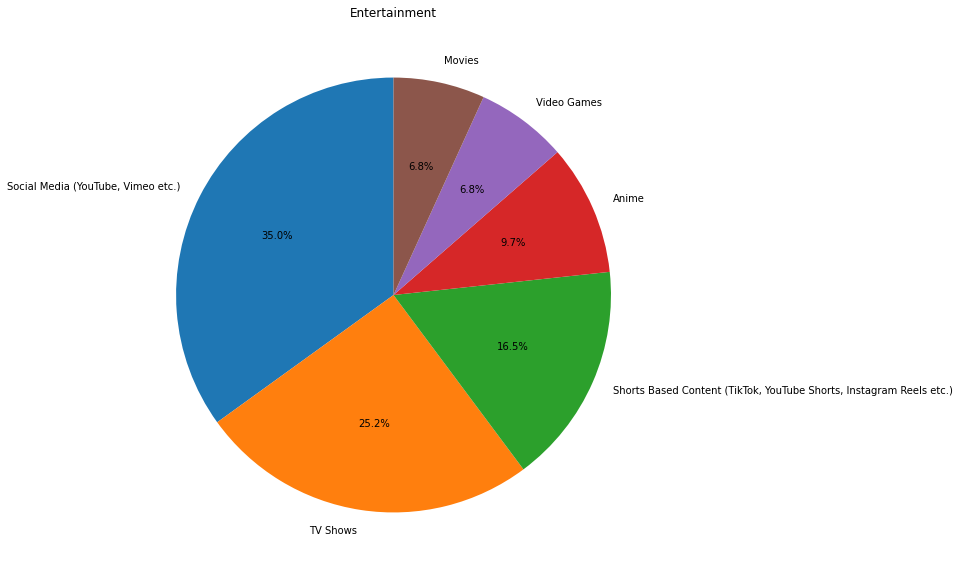

In [73]:
# Create a pie chart for the value counts with White background
plt.figure(figsize=(10, 10))
plt.pie(df['Entertainment'].value_counts(), labels=df['Entertainment'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Entertainment')
plt.show()



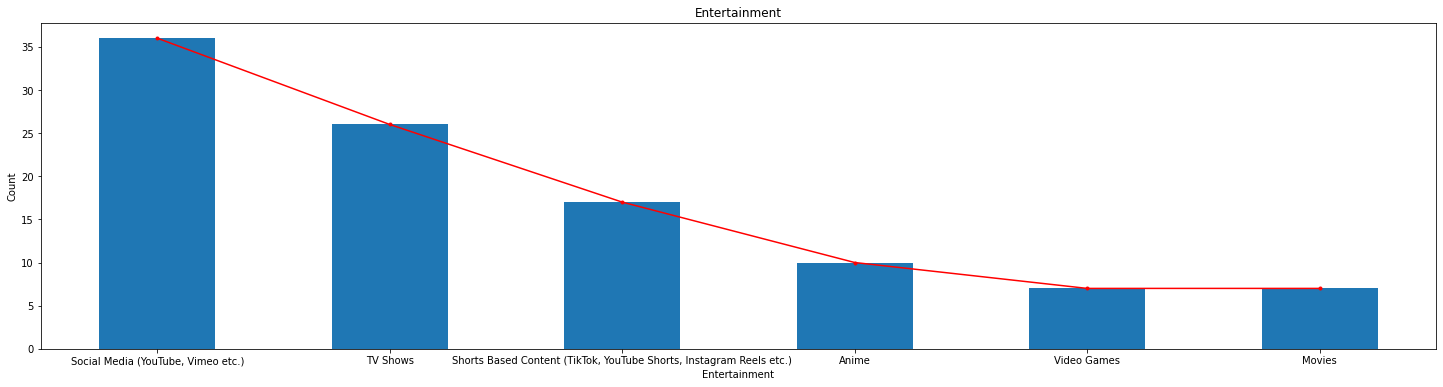

In [74]:
# Create a bar chart for the value counts
df['Entertainment'].value_counts().plot(kind='bar', figsize=(25, 6), rot=0)
df['Entertainment'].value_counts().plot(kind='line', figsize=(25, 6), rot=0, color="red", marker=".")
plt.title('Entertainment')
plt.xlabel('Entertainment')
plt.ylabel('Count')
plt.show()


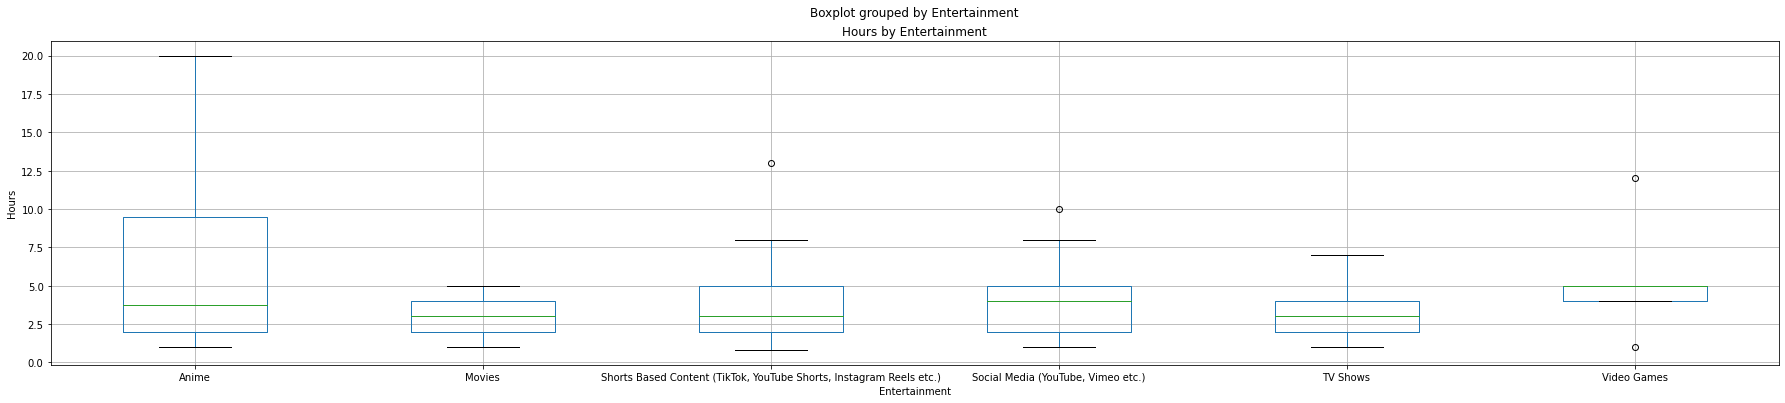

In [75]:
#Create a boxplot for Entertainment
df.boxplot(column='Hours', by='Entertainment', figsize=(30, 6))
plt.title('Hours by Entertainment')
plt.xlabel('Entertainment')
plt.ylabel('Hours')
plt.show()
